# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [2]:
from src.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/electricity/5A'
data_address2 = '/home/dev/deepts/experiments/deep_ar/electricity/5B'

# metric section

In [5]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

102it [00:00, 24154.19it/s]
100%|###########| 100/100 [00:04<00:00, 23.51it/s]


In [6]:
# read the second results
metrics_list2 = read_csv_result('metrics.csv', data_address2)

101it [00:00, 32494.03it/s]
100%|###########| 100/100 [00:03<00:00, 25.16it/s]


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)
sort_metric_list(metrics_list2)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,125.224040,215.796051,235.0,9.791667,8.031874,1.119477,2.436831,0.686689,NaN,16.191738,133.960422,0.541667,215.796054,0.916667,79.634643,1.000000
1,321,0.0,114.192017,203.827271,264.0,11.000000,8.026991,1.058031,2.034714,0.718328,NaN,23.747979,161.448226,0.666667,203.827284,0.875000,98.191774,0.875000
2,642,0.0,172.483398,259.692749,284.0,11.833333,8.025109,1.348334,1.754912,0.737937,NaN,28.970418,192.870648,0.666667,259.692778,0.916667,126.073296,0.916667
3,963,0.0,165.115336,269.065369,189.0,7.875000,8.024132,1.397168,2.723942,0.929522,NaN,34.923288,296.311813,0.875000,269.065366,0.958333,78.638815,1.000000
4,1284,0.0,17.316202,69.897690,166.0,6.916667,8.019890,0.363148,0.727296,0.448247,NaN,8.375391,38.312220,0.208333,69.897696,0.458333,55.292978,0.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,962,320.0,9727.810547,1847.170898,74254.0,3093.916667,287.494114,0.267711,0.024476,0.024712,NaN,1.690499,1358.051270,0.000000,1847.170898,0.291667,974.789600,1.000000
2243,1283,320.0,60380.786458,4999.507812,78719.0,3279.958333,287.257349,0.725178,0.062442,0.064867,NaN,6.529374,2150.144043,0.000000,4999.508057,0.000000,1764.992285,0.625000
2244,1604,320.0,20412.958333,2867.781738,74298.0,3095.750000,287.146950,0.416132,0.036742,0.037249,NaN,2.434689,1363.686670,0.000000,2867.781738,0.458333,1170.989551,0.958333
2245,1925,320.0,9527.542969,1935.928467,68217.0,2842.375000,287.030085,0.281029,0.027969,0.028286,NaN,1.678098,1284.098926,0.000000,1935.928467,0.375000,927.073926,0.958333


In [11]:
metrics_exp_list = [metrics_list1, metrics_list2]

In [12]:
metrics_exp_np = get_metric_list_np(metrics_exp_list)
metrics_exp_np.shape

(2, 2247, 18)

In [13]:
metrics_exp_np.std(axis=0).shape

(2247, 18)

In [14]:
pd.DataFrame(metrics_exp_np.std(axis=0))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
different_indexes_list = get_different_idx(metrics_list1, metrics_list2)

In [16]:
len(different_indexes_list)

0

# Forecast section

In [17]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

102it [00:00, 30580.34it/s]
100%|###########| 100/100 [07:03<00:00,  4.24s/it]
101it [00:00, 34874.84it/s]
100%|###########| 100/100 [01:07<00:00,  1.49it/s]


In [18]:
len(forcast_list1)

100

In [19]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1)
sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [20]:
sorted_forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,12.237657,15.133706,14.737113,13.273027,13.009253,10.864920,...,15.236006,11.304832,16.658216,14.950354,9.879942,14.410413,0,12.512512,4.483272,0.113782
1,1,0,2014-05-26 21:00:00,10.0,9.057462,23.425327,18.301964,15.912202,20.933619,18.706175,...,11.398431,16.693950,22.159515,15.528682,18.099000,22.532503,0,20.143100,8.943163,0.098296
2,1,0,2014-05-26 22:00:00,22.0,14.016649,16.759853,16.560665,17.344568,28.390530,20.900639,...,12.535929,13.358883,11.105467,16.646180,15.013381,18.127542,0,18.553237,4.893311,0.131883
3,1,0,2014-05-26 23:00:00,20.0,20.367722,17.930445,18.271822,19.419256,22.446486,20.939955,...,18.034206,18.024292,19.984255,19.284977,20.002855,19.035078,0,19.515835,3.252827,0.132622
4,1,0,2014-05-27 00:00:00,13.0,14.021609,18.277750,17.327085,17.908405,18.593592,16.991655,...,16.885605,17.977001,15.707679,17.430574,10.972869,21.843857,0,18.176119,2.403508,0.135988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53923,1,2246,2014-06-02 15:00:00,4209.0,3363.751000,3627.042700,3551.163000,3712.490700,3318.937700,3804.443800,...,3107.498300,3482.835400,3320.981200,3763.046600,3438.459700,3614.082500,320,3458.911958,273.041950,0.097485
53924,1,2246,2014-06-02 16:00:00,4120.0,3474.745000,3898.852800,3260.412000,4097.253000,3471.480500,3350.084700,...,3428.526000,3346.625200,3739.480500,3518.259300,3906.076200,3742.893300,320,3498.596012,241.932707,0.141993
53925,1,2246,2014-06-02 17:00:00,3951.0,3649.840300,3583.465000,3453.404800,3705.102800,3562.578900,3402.502000,...,3141.656500,3127.164600,3375.900400,3491.381600,3437.383500,3588.928500,320,3506.911943,263.102431,0.140630
53926,1,2246,2014-06-02 18:00:00,3907.0,3403.365200,3472.571000,3421.258300,3655.747300,3260.040800,3272.351300,...,3045.357400,3276.867700,3248.406700,2886.548800,3494.214600,3417.477000,320,3381.088577,238.001527,0.183526


In [21]:
target_forcast_series = get_forcast_target(forcast_list1)

In [21]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

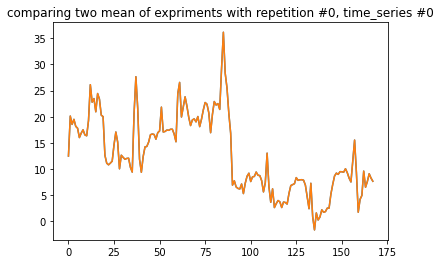

In [22]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
ts_list2[rep_no]['mean'].plot()

### show repetiitons in A and B, which A is bigger than B and the difference is maximum

maximum difference is 10078188.197699


1469487.2720539998

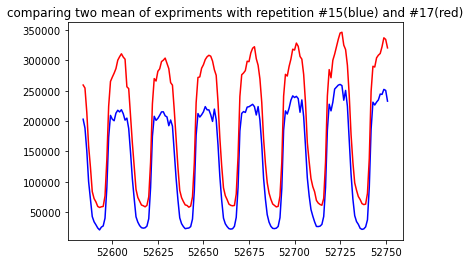

In [23]:

ts_no = 313
higher_flag = False
idx_dif, mx_dif, l_list = get_max_diff_id(ts_no, sorted_forcast_list1, sorted_forcast_list2, higher_flag)

ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)

plot_2_ts(ts_list1, ts_list2, idx_dif[0], idx_dif[1])
# ts_list1[0]['target'].plot(color='black')
print(f'maximum difference is {mx_dif}')
# l_list
abs((ts_list1[4]['mean'] - ts_list2[3]['mean']).sum())

### show repetiitons in A and B, which A is bigger than B and the difference is maximum

maximum difference is 8982.3940171086


574.3157386406301

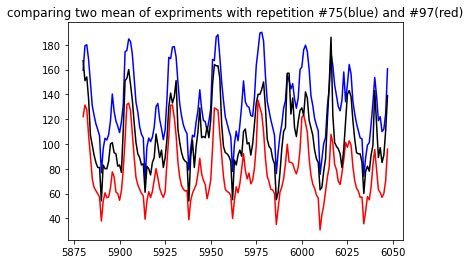

In [24]:
ts_no = 35
higher_flag = True
idx_dif, mx_dif, l_list = get_max_diff_id(ts_no, sorted_forcast_list1, sorted_forcast_list2, higher_flag)

ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)

plot_2_ts(ts_list1, ts_list2, idx_dif[0], idx_dif[1])
ts_list1[0]['target'].plot(color='black')
print(f'maximum difference is {mx_dif}')
# l_list
abs((ts_list1[4]['mean'] - ts_list2[3]['mean']).sum())

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [37]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[97]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[30]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[75]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[97]['mean'] < sorted_forcast_list1[0]['target']).value_counts()


In [39]:
underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiments = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiments = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiments = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiments = {underpred_A_lowest}')



percentage of underprediction of worst repetition for experiments = 0.9724818276220145
percentage of underprediction of best repetition for experiments = 0.5541462690995401
percentage of underprediction of highest repetition for experiments = 0.05574098798397864
percentage of underprediction of lowest repetition for experiments = 0.9724818276220145


(0.0, 1000.0)

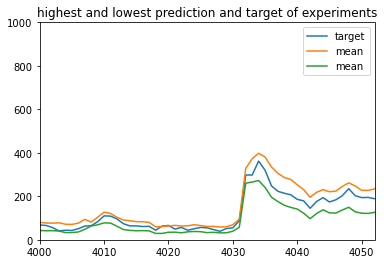

In [42]:
plt.title('highest and lowest prediction and target of experiments')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[75]['mean'].plot(legend=True)
sorted_forcast_list1[97]['mean'].plot(legend=True)
plt.xlim([4000,4052])
plt.ylim([0,1000])

(0.0, 1000.0)

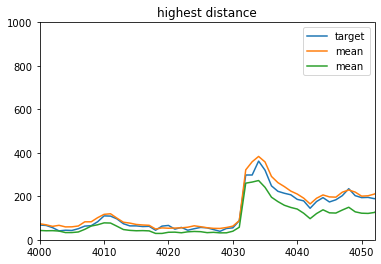

In [43]:
plt.title('highest distance')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[17]['mean'].plot(legend=True)
sorted_forcast_list1[97]['mean'].plot(legend=True)
plt.xlim([4000,4052])
plt.ylim([0,1000])

In [33]:
# find the one with the highest prediction
def get_highest_prediction_id(pred_lists, high_flag=True):
    max_val = -1
    max_idx = -1
    for i in range(len(pred_lists)):
        if high_flag:
            comparison = (pred_lists[i]['mean'] > pred_lists[0]['target']).value_counts()
        else:
            comparison = (pred_lists[i]['mean'] < pred_lists[0]['target']).value_counts()
        proportion = compare_two_series(comparison[True], comparison[False])
        if proportion > max_val:
            max_val = proportion
            max_idx = i
    return max_idx

get_highest_prediction_id(sorted_forcast_list2, high_flag=True)
get_highest_prediction_id(sorted_forcast_list2, high_flag=False)

97

In [34]:
# find max difference between each experiments with itself and also combined
combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [35]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
print(f'the most different tuples of experiment B is: {expB_max_tuple}')
print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (17, 97)
the most different tuples of experiment B is: (17, 97)
the most different tuples of Combined experiments is: (17, 97)


## find the tuples for all the time series (it takes much time)

In [119]:
# get all the 321 pairs here
lower_pair_list = []
higher_pair_list = []

for i in range(321):
    # lower values
    higher_flag = False
    idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    lower_pair_list.append(idx_dif)
    break
    # higher values
    # higher_flag = True
    # idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    # higher_pair_list.append(idx_dif)


In [ ]:
# calculating the most appeared pairs
import statistics 
from statistics import mode 

mode(lower_pair_list), mode(higher_pair_list)

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

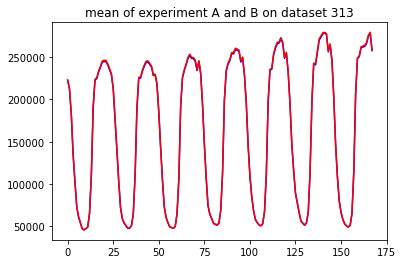

In [124]:
ts_no = 313

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
for idx, ts_df2 in enumerate(ts_list2):
    means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue')
plt.plot(mean_means_B, color='red')
# plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

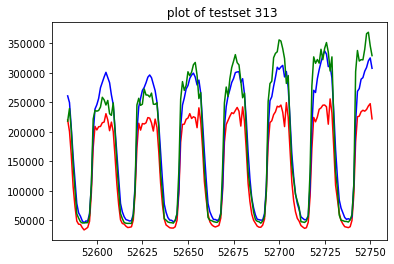

In [47]:
ts_no = 313
# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)

plt.title(f' plot of testset {ts_no}')
ts_list2[97]['mean'].plot(color='r')
ts_list2[75]['mean'].plot(color='b')
ts_list2[63]['target'].plot(color='g')
